# Overview

This week is about two topics. Decision trees and clustering. The main exercise will be on decision trees, and we'll also talk a bit about unbalanced data sets as well as a little exercise on clustering, an example of unsupervised learning.  

## Part 1: Decision trees (DSFS Chapter 17)

> _Reading I_: The visual introduction to decision trees on [**this webpage**](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
) is AMAZING. Take a look to get an intuitive feel for how trees work. Do not miss this one, it's a treat!

---

> _Reading II_: DSFS Chapter 17. Work through chapter 17 of the book. It's not as flashy as the fancy `D3.js` based web-explanation above, but it's very good (in my humble opinion).

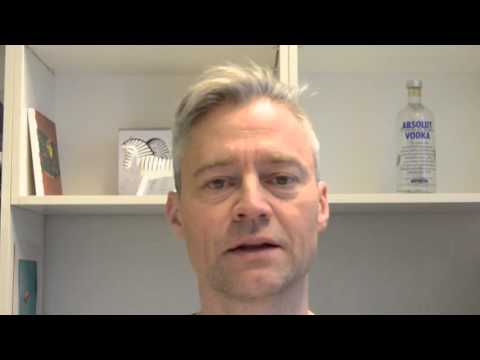

In [1]:
# Ole explains decision trees
from IPython.display import YouTubeVideo
YouTubeVideo("LAA_CnkAEx8",width=600, height=338)

> _Exercises_: Just a few questions to make sure you've read the text and/or watched the video.
>
> * There are two main kinds of decision trees depending on the type of output (numeric vs. categorical). What are they?
> * Explain in your own words: Why is _entropy_ useful when deciding where to split the data?
> * Why are trees prone to [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg)?
> * Explain (in your own words) how random forests help prevent overfitting.

Chief Suneman arrives at work one day and immediately starts motivating the team by randomly yelling at everyone in order to increase morale - something like [this](https://www.youtube.com/watch?v=L_QCioSGgwU). After a while, the team gets him calmed down with a cup of coffee and a movie. It doesn't help, after watching the first 10 minutes (see below) he comes out of his office with an outrageous request for the newly appointed data science team

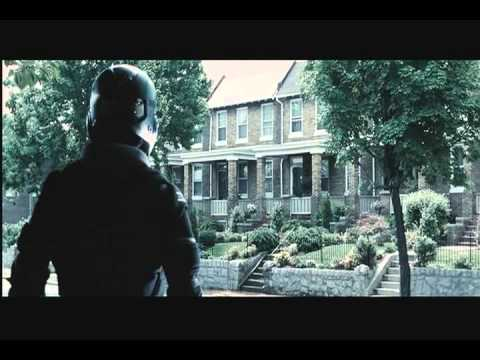

In [2]:
YouTubeVideo("BmSarhudhiY",width=600, height=300)

The chief wants you to start from real data and build a system that replicates the functionality in the _Minority Report_ system. Imagine, we find out that certain type of crime is going to take place - as well as the exact time of the crime - **but that we don't know _where_**, then Suneman wants an algorithm that will predict which district the crime is most likely to take place in. Specifically, let's build an algorithm that predicts the location of a crime based on its type and time.

The friendly leader of the data-science team, Captain Mones, helps break down the task.

> _Exercise_: Building the _minority report_ algorithm
>
> * Use the category of the crimes to build a decision tree that predicts the corresponding district. You can implement the ID3 tree in the DSFS book, or use the [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modules/tree.html) class in scikit-learn. For training, you can use 90% of the data and test the tree prediction on the remaining 10%. 
>  - What is the fraction of correct predictions? 
>  - What are the correct predictions if you restrict the training/prediction to single districts (for example, predicting Mission vs. all other districts, etc)? 
>   - Compare it to the random guess, what would you get if you'd guess a district randomly? 
>   - And if you'd guess always one of the districts (for example the district with the most crimes)?
> * Now, add the day of the week to the features, do any of the the performance measures improve? 
> * ***OPTIONAL***: Visualize the tree so that you can see what it actually does! For visualization, you can use the export_graphviz method of `scikit-learn` and then convert the `.dot` file to a PDF. 
>   - **Note**: [in order to use GraphViz in IPython, you need to install it on your system first](http://www.graphviz.org/Download..php)!
>       - **Windows users** should download and install the *.msi* file and not the zip file
>       - **MAC users** should download and install the *.pkg* file
>       - If you see the error *"Couldn't import dot_parser"* you can try the following steps:
```
            >>> ~/anaconda/bin/pip uninstall pyparsing
            >>> ~/anaconda/bin/pip uninstall pydot
            >>> ~/anaconda/bin/pip install pyparsing==1.5.7
            >>> ~/anaconda/bin/pip install pydot
            > And then restart the kernel
```
> * As you might see in the visualization, the tree runs out of possible feature values to check before refining the decision. Try increasing the number of features: add part of the day (`night`=0-5, `morning`=6-10, `midday`=11-14, `afternoon`=15-17, `evening`=18-23). Is it better? What is the problem we're solving by breaking the day into parts rather than raw hour values?
> * Let's try some examples to see if the algorithm is working. 
>  - There is a new crime (prositution) on Monday 10pm. What are the three most likely districts? 
>  - Also find the most likely districts for a gambling on Wednesday 1pm. 
>  - And also try out an arson case on Sunday 7am?
> * It's unlikely that the classifier overfits in our case. Explain why. 

In [2]:
from sklearn import tree
from geoplotlib.utils import read_csv
import numpy as np
data = read_csv('../files/Map__Crime_Incidents_-_from_1_Jan_2003.csv')
print data.keys()


['Category', 'IncidntNum', 'Address', 'DayOfWeek', 'Descript', 'PdDistrict', 'Y', 'Location', 'Time', 'Date', 'X', 'Resolution']


In [3]:
def dict_for_feature(feature='Category'):
    features = set(data[feature])
    f_dict = dict(
        (cat, ind) for (ind, cat) in enumerate(features)
    )
    return f_dict

categ_dict = dict_for_feature('Category')
district_dict = dict_for_feature('PdDistrict')
dow_dict = dict_for_feature('DayOfWeek')
      
X = np.array(
    map(lambda (x, y, z): [categ_dict[x], dow_dict[y], z ],
        zip(data['Category'], data['DayOfWeek'], data['X'])
       )
    )
# X = X.reshape(-1, 1)
Y = np.array(map(lambda x: district_dict[x], data['PdDistrict']))
Y = Y.reshape(-1, 1)
data_size = len(data['Category'])
training_size = int(0.9 * data_size)
print categ_dict
print district_dict

{'KIDNAPPING': 0, 'WEAPON LAWS': 1, 'SECONDARY CODES': 2, 'WARRANTS': 3, 'LOITERING': 4, 'EMBEZZLEMENT': 5, 'SEX OFFENSES, NON FORCIBLE': 6, 'FRAUD': 21, 'DRIVING UNDER THE INFLUENCE': 9, 'ROBBERY': 10, 'BURGLARY': 11, 'STOLEN PROPERTY': 33, 'SUSPICIOUS OCC': 12, 'RECOVERED VEHICLE': 22, 'ASSAULT': 34, 'FORGERY/COUNTERFEITING': 15, 'BAD CHECKS': 17, 'PORNOGRAPHY/OBSCENE MAT': 7, 'GAMBLING': 19, 'OTHER OFFENSES': 20, 'DRUNKENNESS': 18, 'SUICIDE': 8, 'ARSON': 13, 'SEX OFFENSES, FORCIBLE': 23, 'DRUG/NARCOTIC': 24, 'TRESPASS': 25, 'PROSTITUTION': 16, 'VANDALISM': 27, 'MISSING PERSON': 36, 'LIQUOR LAWS': 30, 'TREA': 31, 'VEHICLE THEFT': 32, 'EXTORTION': 29, 'BRIBERY': 14, 'FAMILY OFFENSES': 35, 'NON-CRIMINAL': 28, 'DISORDERLY CONDUCT': 37, 'RUNAWAY': 38, 'LARCENY/THEFT': 26}
{'': 0, 'CENTRAL': 1, 'NORTHERN': 2, 'PARK': 4, 'SOUTHERN': 3, 'MISSION': 5, 'TENDERLOIN': 6, 'RICHMOND': 7, 'TARAVAL': 8, 'INGLESIDE': 9, 'BAYVIEW': 10}


In [4]:
#Create model
clf = tree.DecisionTreeClassifier()
#Train model with 90% of data
clf = clf.fit(X[:training_size],Y[:training_size])



In [5]:
# Test the model
results = [clf.predict([X[i]]) for i in range(training_size, data_size)]
actual = Y[training_size:data_size]
s_f = { True: 0, False: 0}
for i in range(len(results)):
    if results[i] == actual[i]:
        s_f[True] += 1
    else:
        s_f[False] += 1
            
print "Success rate: {:.2f}".format((100.0*s_f[True])/sum(s_f.values())) 

Success rate: 81.69


### Digression: Decision trees and unbalanced data

An important problem in many data-science problems is _unbalanced data_. We consider a dataset balanced when the categories we care about have about equal size (e.g. if we want to predict the gender of individuals in the general population). When the category size are imbalanced (e.g. if we are looking for people with a rare disease such as _leukemia_ in the general population), many machine learning algorithms can have problems.

> _Reading_: [This article](http://arstechnica.co.uk/security/2016/02/the-nsas-skynet-program-may-be-killing-thousands-of-innocent-people/) does a great job of explaining the problem.

---

> _Exercises_: I know you read the article above, but just a few questions to make you reflect on the details of the story.
> 
> * Explain what features go into the terrorist detection model
> * Which algorithm is used to detect the terrorists?
> * Do you agree with the algorithm that Al-Jazeera bureau chief is a good target? Justify your answer.
> * What's the size of the training set?

A: 55 million
> * Why is it still a problem that the algorithm has a false alam rate at 0.18% at a 50% miss rate?

A: Almost 2 in a 1000 people are misidentified. With 55 million people being analysed, nearly 100,000 people would get wrongly flagged as terrorists. 
> * Do you have a better grasp of the problems with overfitting after reading this article?

## Part 2: Clustering (DSFS Chapter 19)

Clustering is an important _unsupervised_ method to reveal structure in the data. You've already done a lot of hard work today, so let's make this one as easy as possible.

> _Reading_: Check out chapter 19 of DSFS

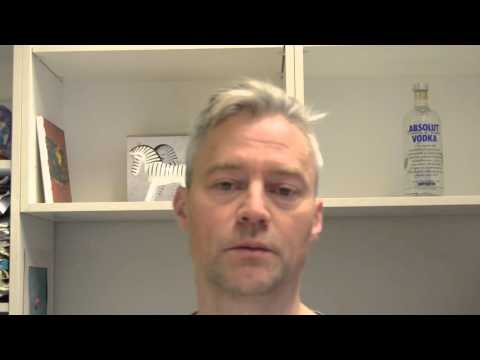

In [7]:
# Ole talks about clustering
YouTubeVideo("G7jYVrCVygU",width=600, height=338)

In this exercise we explore $K$-means clustering - and we it out on the locations of the `PROSTITUTION` crime type. Applying a clustering method makes sense because we know from our earlier work that this crime type tends to happen in only a few locations. We'll also talk a little bit about model selection and [overfitting](https://www.youtube.com/watch?v=DQWI1kvmwRg) in unsupervised models.

> _Exercise_: $K$-means
> 
> * Visualize the prostitution data (e.g. by plotting it on a map)
> * Train models of $K = 2,\ldots,10$ on the prostitution data.
> * Explore how the total squared error changes as a function of $K$ and identify what you think is the right number of clusers based on the knee-point in the squared error plot.

K-Means clustering partitions n objects into k clusters. Each object will belong to the cluster with the nearest mean. By using this method, k different clusters with the possible distinction will be produced, and the best number of k will lead to a distance between the data. The point with k-means clustering is to minimize the squared error function, or in other words: to minimize bias by the sum of squared distances between each observation and its closest average position. 

> * And by the way: The fit only gets better when we add more means - why not keep adding more of them: Explain in your own words why it makes sense to stop around a knee-point.

When increasing the number of clusters used in the prediction model does not significantly alter the accuracy of the system, we say that we have reached the 'knee' or 'elbow' point. Increasing the number of clusters unneccessarily increases the complexity of the model without adding sufficient value by doing so. Calculating and graphing the sum of squared errors simplifies the process of finding the knee point. If a model can be categorized with a 4 cluster K-Means model, increasing the number of clusters to 100 does not make much sense in terms of usability although the accuracy is technically higher. 

> * Another way of estimating the right number of clusters in a $K$-means problem is _stability analysis_. The idea is the following
>   - For each $K = 2,\ldots,10$ generate $N = 10$ clusterings based on random 50% of data (or some other fraction of data/bootstrap).
>   - Divide the space up into an e.g. 20 by 20 grid, and give each gridpoint an index $i$ in the range 1-400. 
>   - Now represent each clustering as a vector $\mathbf{c}^K$, which where the $j$th entry $c_j^K$ is given by the number of centroids in that gridpoint. Most of the entries will be zero, and we have that $\sum_{j = 1}^{400} c_j^K = K$.
>   - We now define _stability_ for some value of $K$ as average pairwise similarity of the $N$ clusterings, where the similarity between clustering $i$ and $j$ is the cosine distance between clustering vectors $\mathbf{c}^K(i)$ and $\mathbf{c}^K(j)$.
>   - We now say that the right $K$ maximizes stability.
> * Explain why stability should help you find the right number of clusters.

A clustering algorithm is a procedure that takes a set S of points as input and outputs a clustering of S. The intuitive idea behind the method of stability is that if we repeatedly sample data points and apply the clustering method, then a "good" algorithm should produce clusterings that do not vary much from one sample to another. The algorithm is stable with respect to input randomization.

> * **Optional**: Perform stability analysis on the prostitution data. 

In [6]:
import geoplotlib
from sklearn.cluster import KMeans

def get_by_category(category="PROSTITUTION", data=data):
    result = {'lon': [], 'lat': []}
    for (i,item) in enumerate(data['Category']):
        if item == category:
            result['lon'].append(data['X'][i])
            result['lat'].append(data['Y'][i])
    return result

prostitution_data = get_by_category("PROSTITUTION")
for (i,lats) in enumerate(prostitution_data['lat']):
    if lats > 89:
        prostitution_data['lat'].pop(i)
        prostitution_data['lon'].pop(i)
    


In [19]:
X = zip(prostitution_data['lat'], prostitution_data['lon'])

y_pred = []
numK = range(2,11)

for j in numK:
    y_pred.append(KMeans(n_clusters=j).fit(X))


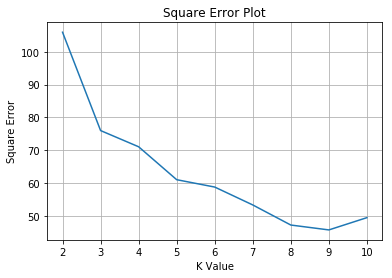

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

#Calculate Error
totalError = []
error = 0

for r in y_pred:
    error = 0
    for i, x in enumerate(X) :
        error += distance.euclidean(x, r.cluster_centers_[r.labels_[i]])     
    totalError.append(error)

plt.title('Square Error Plot')
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Square Error')
plt.plot(numK, totalError)
plt.show()

In [8]:
from matplotlib.pyplot import get_cmap



cmap = get_cmap('Dark2')
kmeans_results = {'lat': [], 'lon': [], 'c': []}

X = zip(prostitution_data['lat'], prostitution_data['lon'])
bbox = geoplotlib.utils.BoundingBox(max(prostitution_data['lat']),
                                    min(prostitution_data['lon']),
                                    min(prostitution_data['lat']),
                                    max(prostitution_data['lon']))

In [12]:
for y_pred in y_predicted:
    geoplotlib.set_bbox(bbox)
    for i in range(len(y_pred)):
        c = cmap(float(y_pred[i])/max(y_pred))
        c = map(lambda x: int(255*x), c)

        geoplotlib.dot({'lat': X[i][0], 'lon': X[i][1]}, color=c)
    geoplotlib.inline()

In [13]:
import json
with open('kmeans.json', 'w') as outfile:
    json.dump(kmeans_results, outfile)